# 1. Clustering Jerárquico

## Agrupación jerárquica

La agrupación jerárquica funciona colocando primero cada punto de datos en su propio grupo y luego fusionando los grupos en función de alguna regla, hasta que solo quede el número deseado de grupos. Para que esto funcione, es necesario que haya una medida de distancia entre los puntos de datos. Con esta medida de distancia `d`, podemos definir otra medida de distancia entre los **clusters** U y V usando uno de los siguientes métodos (*vínculos*):

* `single`: $d(U, V) := \min_{u \in U, v \in V} d(u,v)$ 
             basado en dos objetos más cercanos
* `complete`: $d(U, V) := \max_{u \in U, v \in V} d(u,v)$ 
             basado en dos objetos más lejanos
* `average`: $d(U, V) := \sum_{u \in U, v \in V} \frac{d(u,v)}{|U||V|}$
             basado en la media aritmética de todos los objetos
* `ward`: intenta minimizar la varianza en cada grupo
* `centroids`: basado en la media geométrica de todos los objetos
* `median`: basado en la mediana de todos los objetos

En cada iteración del algoritmo, se fusionan dos grupos más cercanos entre sí. Después de esto, se vuelve a calcular la distancia entre los conglomerados y luego continúa con la siguiente iteración.

- Creación de una matriz de distancias mediante vinculación
     - ```método```: cómo calcular la proximidad de los conglomerados
     - ```metric```: métrica de distancia
     - ```optimal_ordering```: puntos de datos del pedido

# Importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Utilizar el dendrograma para encontrar el número óptimo de clusters

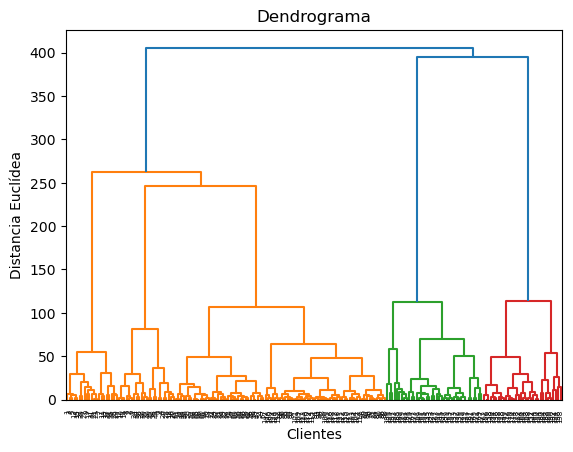

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()

# Ajustar el clustering jerárquico a nuestro conjunto de datos

In [7]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)
y_hc

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Visualización de los clusters

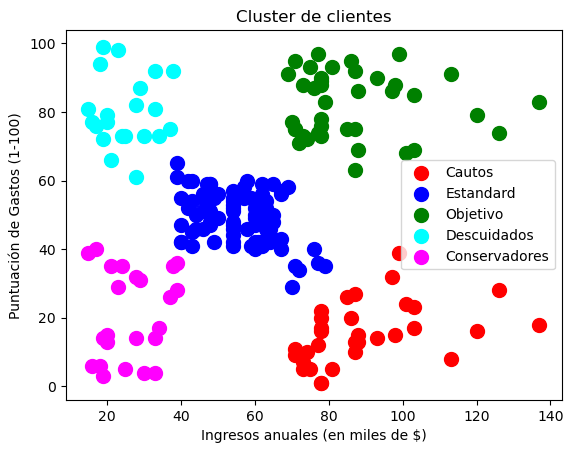

In [8]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cautos")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Estandard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Objetivo")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Descuidados")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Conservadores")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

### Un Ejemplo utilizando la librería Scipy

In [9]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

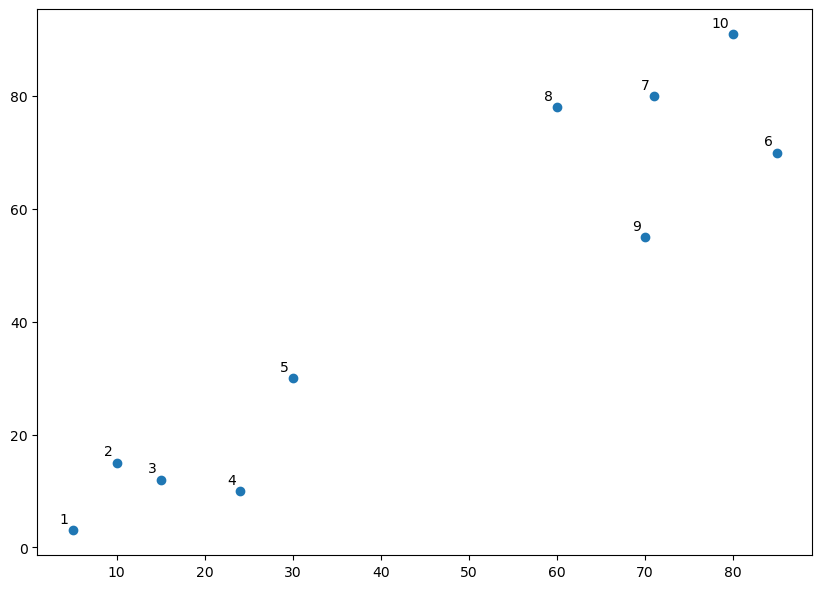

In [10]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

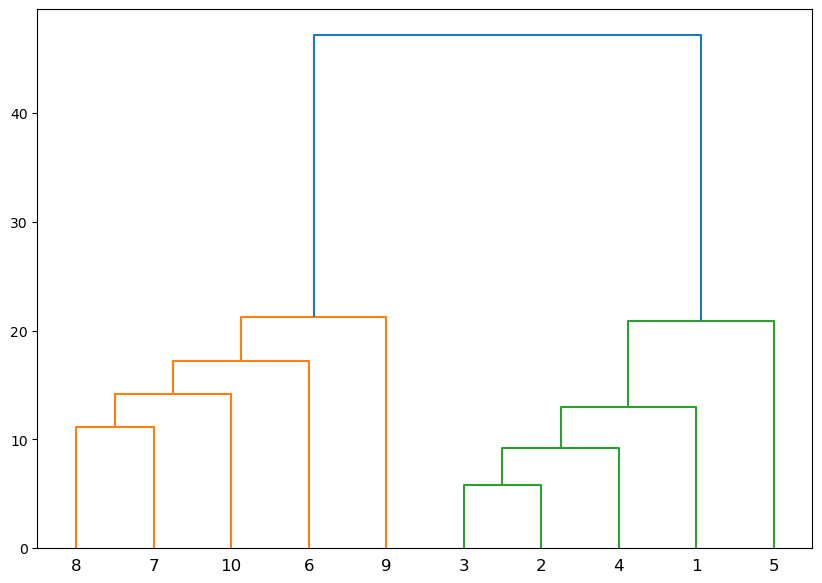

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## with scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


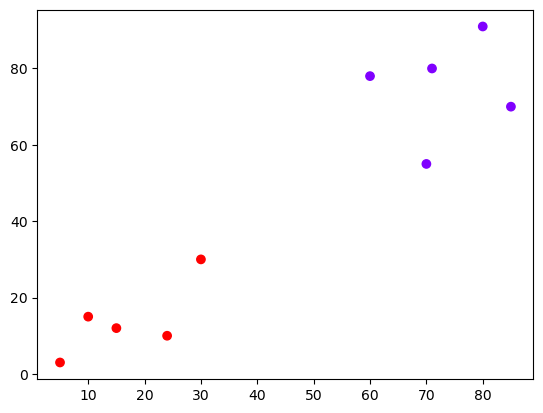

In [14]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


### Agrupación jerárquica: método ward
¡Es hora de Comic-Con! Comic-Con es una convención anual basada en cómics que se celebra en las principales ciudades del mundo. Tienes los datos del paso del año pasado, el número de personas en el campo de la convención en un momento dado. Le gustaría decidir la ubicación de su puesto para maximizar las ventas. Utilizando el método de la sala, aplique agrupaciones jerárquicas para encontrar los dos puntos de atracción en el área.

- Preprocesamiento

In [15]:
comic_con = pd.read_csv('comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [16]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

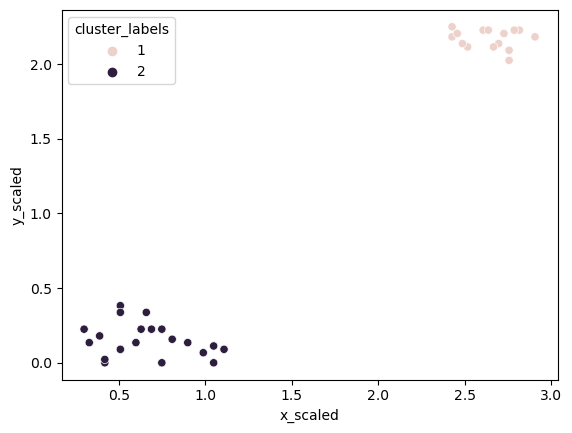

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Agrupación jerárquica: método single
Usemos el mismo conjunto de datos de pisadas y verifiquemos si se ven cambios si usamos un método diferente para la agrupación.

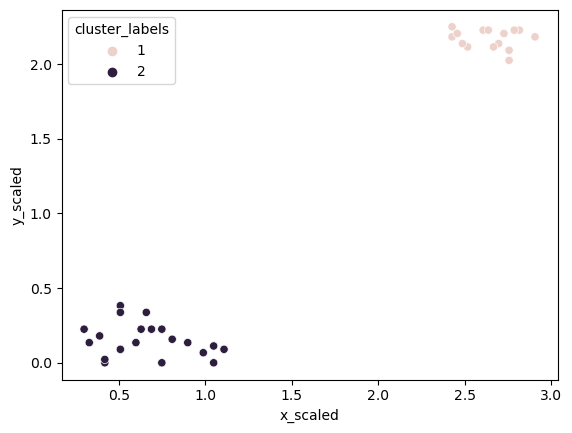

In [18]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Agrupación jerárquica: método complete
Por tercera y última vez, usemos el mismo conjunto de datos de pisadas y verifiquemos si se observan cambios si usamos un método diferente para la agrupación.



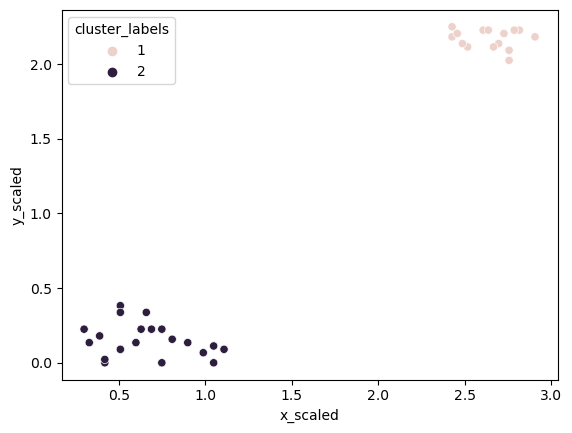

In [19]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

## Visualizar clústeres
- ¿Por qué visualizar clústeres?
     - Trate de dar sentido a los grupos formados
     - Un paso adicional en la validación de clústeres.
     - Detectar tendencias en los datos

### Visualice clústeres con matplotlib
Hemos comentado que las visualizaciones son necesarias para evaluar los clústeres que se forman y detectar tendencias en sus datos. Centrémonos ahora en visualizar el conjunto de datos de pisadas de Comic-Con utilizando el módulo matplotlib.

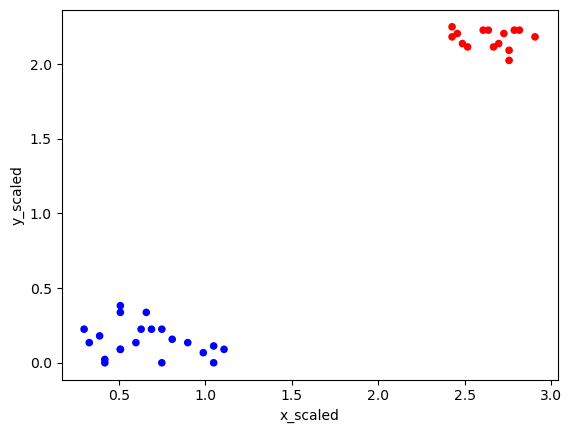

In [20]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]));

### Visualice grupos con seaborn
Visualicemos ahora el conjunto de datos de pisadas de Comic Con utilizando el módulo seaborn. Visualizar clústeres usando seaborn es más fácil con la función incorporada `` `hue`` para etiquetas de clúster.

<Axes: xlabel='x_scaled', ylabel='y_scaled'>

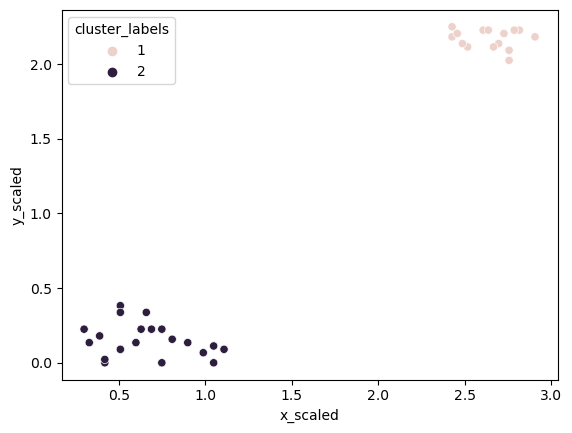

In [21]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

## ¿Cuántos clusters?
- Introducción a los dendrogramas
     - Estrategia hasta ahora: decide los grupos en la inspección visual
     - Los dendrogramas ayudan a mostrar progresiones a medida que se fusionan los grupos
     - Un dendrograma es un diagrama de ramificación que demuestra cómo se compone cada grupo al ramificarse en sus nodos secundarios.

### Crea un dendrograma
Los dendrogramas son diagramas de ramificación que muestran la fusión de grupos a medida que nos movemos por la matriz de distancias. Usemos los datos de pisadas de Comic Con para crear un dendrograma.



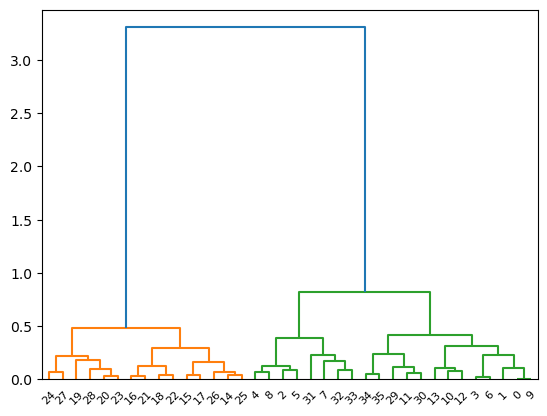

In [22]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

### Limitaciones de la agrupación jerárquica
- Comparación del tiempo de ejecución del método de vinculación
     - Aumento del tiempo de ejecución con puntos de datos.
     - Aumento cuadrático del tiempo de ejecución
     - No es factible para grandes conjuntos de datos

### Ejecución de tiempo de agrupación jerárquica
En ejercicios anteriores de este capítulo, usó los datos de la pisada de Comic-Con para crear clústeres. En este ejercicio, calculará cuánto tiempo lleva ejecutar el algoritmo en el sistema de DataCamp.

Recuerde que puede cronometrar la ejecución de pequeños fragmentos de código con:
```python
%timeit sum([1, 3, 2])
```

In [23]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

797 µs ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2. Agrupación por densidad
### Un ejemplo más complicado

El algoritmo de k-medias puede tener dificultades cuando los grupos no tienen formas convexas:

In [24]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

In [25]:
X

array([[ 0.81680544,  0.5216447 ],
       [ 1.61859642, -0.37982927],
       [-0.02126953,  0.27372826],
       [-1.02181041, -0.07543984],
       [ 1.76654633, -0.17069874],
       [ 1.8820287 , -0.04238449],
       [ 0.97481551,  0.20999374],
       [ 0.88798782, -0.48936735],
       [ 0.89865156,  0.36637762],
       [ 1.11638974, -0.53460385],
       [-0.36380036,  0.82790185],
       [ 0.24702417, -0.23856676],
       [ 1.81658658, -0.13088387],
       [ 1.2163905 , -0.40685761],
       [-0.8236696 ,  0.64235178],
       [ 0.98065583,  0.20850838],
       [ 0.54097175,  0.88616823],
       [ 0.348031  , -0.30101351],
       [ 0.35181497,  0.88827765],
       [-0.77708642,  0.82253872],
       [ 1.92590813,  0.01214146],
       [ 0.86096723, -0.47653216],
       [ 0.19990695,  0.99672359],
       [ 1.2895301 , -0.37071087],
       [-0.27847636,  1.02538452],
       [ 0.24187916, -0.07627812],
       [ 1.84988768, -0.09773674],
       [ 1.88406869,  0.0449402 ],
       [ 0.165822  ,

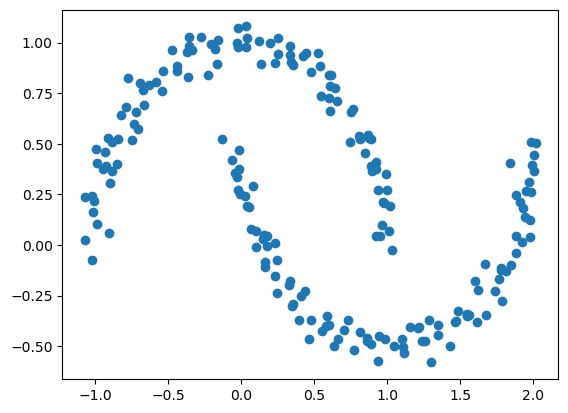

In [26]:
plt.scatter(X[:,0], X[:,1]);

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


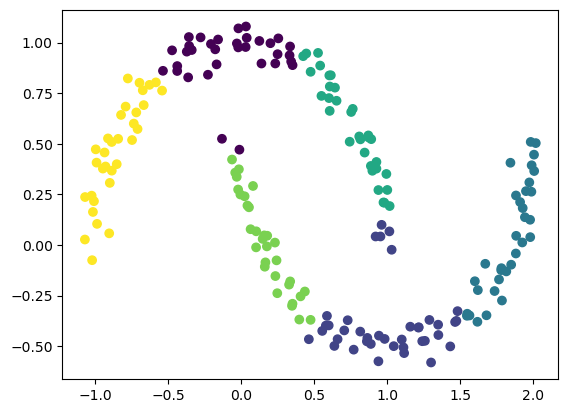

In [27]:
from sklearn.cluster import KMeans
model=KMeans(6)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

La agrupación no funciona bien ahora, ya que no es posible separar las dos agrupaciones con una línea. Podríamos incrustar este conjunto de datos en un espacio dimensional superior, donde la separación es posible. Y luego aplique el agrupamiento de k-medias.

Alternativamente, podemos usar un tipo diferente de algoritmo de agrupamiento para este caso. El * algoritmo DBSCAN * se basa en densidades y funciona bien con datos cuya densidad en los clústeres es uniforme.

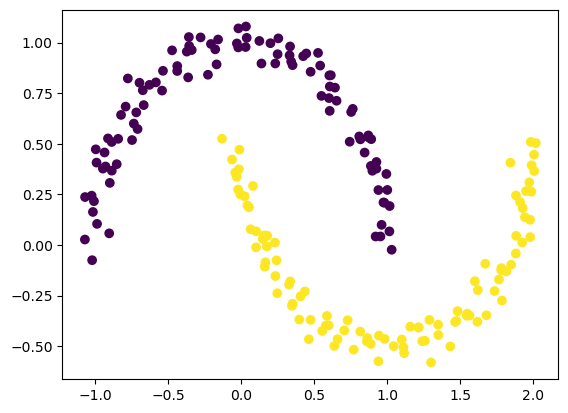

In [28]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

La buena noticia es que DBSCAN no requiere que el usuario especifique el número de clústeres. Pero ahora el algoritmo depende de otro hiperparámetro: un umbral para la distancia (aquí 0,3).